In [1]:
import pandas as pd
import pickle, joblib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("data/who_statistics.csv")
dataframe = dataframe.drop(['supply_chain_plan', 'who_region', 'cname', 'incineration', 'burial', 'open_burning', 'annual_work_plan', 'electronic_stock'], axis=1)
dataframe = dataframe[dataframe.columns.drop(list(dataframe.filter(regex='cause')))]
dataframe = dataframe[dataframe.columns.drop(list(dataframe.filter(regex='policy')))]
dataframe = dataframe[dataframe.columns.drop(list(dataframe.filter(regex='stockout')))]

In [3]:
dataframe

,myp,dis_plan,dtp3_lt_50,dtp3_50_79,dtp3_gt_80,dtp3_gt_95,dtp3_gt_90,no_dtp3_cov,mcv1_lt_50,mcv1_50_79,...,dtp1_dtp3_drop,dtp1_mcv1_drop,mcv1_mcv2_drop,vitamin_a_deficiency,high_bacterial_rate,hepb,ipv,mmr,pcv,rotavirus
0,Yes,0.0,6.0,26.0,68.0,35.0,47.0,0.00,6.0,34.0,...,13.00,18.00,26.83,Yes,No,Yes,Yes(OPV),Yes,Yes,Yes
1,Yes,100.0,0.0,0.0,100.0,97.0,100.0,0.00,0.0,3.0,...,0.10,4.85,NaN,No,No,Yes,Yes(S),Yes,Yes,No
2,No,100.0,0.0,0.0,100.0,0.0,100.0,82.42,0.0,35.0,...,3.06,18.37,3.75,No,No,Yes,Yes(S),Yes,Yes,No
3,Yes,100.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,...,0.47,0.78,4.25,No,No,Yes,Yes,Yes,Yes,No
4,Yes,100.0,12.0,23.0,65.0,38.0,49.0,NaN,14.0,38.0,...,13.80,18.64,55.70,No,Yes,Yes,Yes(OPV),Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,No,0.0,25.0,41.0,34.0,20.0,25.0,0.00,12.0,39.0,...,28.57,11.90,47.30,No,Yes,Yes,Yes(S),Yes,Yes,Yes
190,Yes,100.0,0.0,74.0,25.0,5.0,8.0,0.00,0.0,2.0,...,4.87,NaN,7.02,Yes,No,Yes,Yes(OPV),Yes,No,No
191,Yes,100.0,12.0,35.0,54.0,20.0,28.0,0.00,14.0,50.0,...,8.05,17.24,25.00,Yes,No,Yes,Yes(OPV),Yes,Yes,Yes
192,Yes,100.0,0.0,20.0,80.0,44.0,58.0,0.00,0.0,11.0,...,4.26,0.00,30.85,Yes,No,Yes,Yes(OPV),Yes,Yes,Yes


In [4]:
dataframe.isnull().sum()

myp                      4
dis_plan                47
dtp3_lt_50              18
dtp3_50_79              18
dtp3_gt_80              18
dtp3_gt_95              18
dtp3_gt_90              18
no_dtp3_cov             17
mcv1_lt_50              26
mcv1_50_79              26
mcv1_gt_80              26
mcv1_gt_95              26
mcv1_gt_90              27
no_mcv1_cov             16
mcv2_lt_50              82
mcv2_50_79              75
mcv2_gt_80              55
mcv2_gt_95              56
mcv2_gt_90              55
no_mcv2_cov             16
dtp_drop_gt_10          54
dtp1_dtp3_drop          25
dtp1_mcv1_drop          42
mcv1_mcv2_drop          58
vitamin_a_deficiency     0
high_bacterial_rate      0
hepb                     0
ipv                      0
mmr                      0
pcv                      0
rotavirus                0
dtype: int64

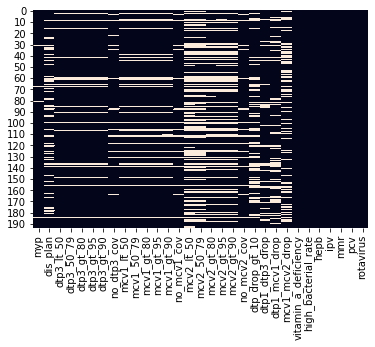

In [5]:
sns.heatmap(dataframe.isnull(), cbar=False)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   myp                   190 non-null    object 
 1   dis_plan              147 non-null    float64
 2   dtp3_lt_50            176 non-null    float64
 3   dtp3_50_79            176 non-null    float64
 4   dtp3_gt_80            176 non-null    float64
 5   dtp3_gt_95            176 non-null    float64
 6   dtp3_gt_90            176 non-null    float64
 7   no_dtp3_cov           177 non-null    float64
 8   mcv1_lt_50            168 non-null    float64
 9   mcv1_50_79            168 non-null    float64
 10  mcv1_gt_80            168 non-null    float64
 11  mcv1_gt_95            168 non-null    float64
 12  mcv1_gt_90            167 non-null    float64
 13  no_mcv1_cov           178 non-null    float64
 14  mcv2_lt_50            112 non-null    float64
 15  mcv2_50_79            1

In [7]:
categorical_feature_mask = dataframe.dtypes == object
numeric_feature_mask = dataframe.dtypes != object

categorical_cols = dataframe.columns[categorical_feature_mask].tolist()

numeric_cols = dataframe.columns[numeric_feature_mask].tolist()

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(dataframe[numeric_cols])
imputed_data = imputer.transform(dataframe[numeric_cols])
imputed_data

array([[  0.  ,   6.  ,  26.  , ...,  13.  ,  18.  ,  26.83],
       [100.  ,   0.  ,   0.  , ...,   0.1 ,   4.85,   0.  ],
       [100.  ,   0.  ,   0.  , ...,   3.06,  18.37,   3.75],
       ...,
       [100.  ,  12.  ,  35.  , ...,   8.05,  17.24,  25.  ],
       [100.  ,   0.  ,  20.  , ...,   4.26,   0.  ,  30.85],
       [100.  ,   0.  ,   6.  , ...,   5.32,   6.38,  11.36]])

In [9]:
dataframe[numeric_cols] = imputed_data

In [10]:
dataframe.shape

(194, 31)

In [11]:
dataframe.isnull().sum()

myp                     4
dis_plan                0
dtp3_lt_50              0
dtp3_50_79              0
dtp3_gt_80              0
dtp3_gt_95              0
dtp3_gt_90              0
no_dtp3_cov             0
mcv1_lt_50              0
mcv1_50_79              0
mcv1_gt_80              0
mcv1_gt_95              0
mcv1_gt_90              0
no_mcv1_cov             0
mcv2_lt_50              0
mcv2_50_79              0
mcv2_gt_80              0
mcv2_gt_95              0
mcv2_gt_90              0
no_mcv2_cov             0
dtp_drop_gt_10          0
dtp1_dtp3_drop          0
dtp1_mcv1_drop          0
mcv1_mcv2_drop          0
vitamin_a_deficiency    0
high_bacterial_rate     0
hepb                    0
ipv                     0
mmr                     0
pcv                     0
rotavirus               0
dtype: int64

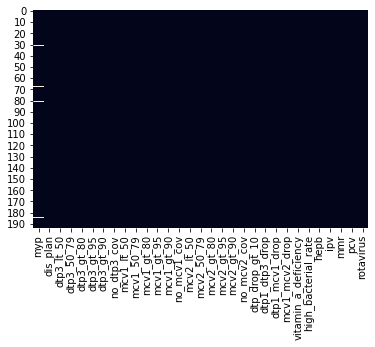

In [12]:
sns.heatmap(dataframe.isnull(), cbar=False)

In [13]:
dataframe = dataframe.dropna()

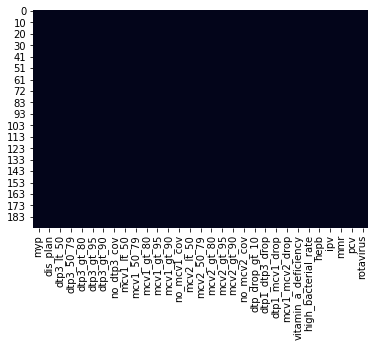

In [14]:
sns.heatmap(dataframe.isnull(), cbar=False)

In [15]:
dataframe.shape

(190, 31)

In [16]:
categorical_cols

['myp',
 'vitamin_a_deficiency',
 'high_bacterial_rate',
 'hepb',
 'ipv',
 'mmr',
 'pcv',
 'rotavirus']

In [17]:
yes_no_bool_mapper = {'Yes': 1, 'No': 0}
dataframe.myp = dataframe.myp.map(yes_no_bool_mapper)
dataframe.head()

/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,myp,dis_plan,dtp3_lt_50,dtp3_50_79,dtp3_gt_80,dtp3_gt_95,dtp3_gt_90,no_dtp3_cov,mcv1_lt_50,mcv1_50_79,...,dtp1_dtp3_drop,dtp1_mcv1_drop,mcv1_mcv2_drop,vitamin_a_deficiency,high_bacterial_rate,hepb,ipv,mmr,pcv,rotavirus
0,1,0.0,6.0,26.0,68.0,35.0,47.0,0.00,6.0,34.0,...,13.00,18.00,26.83,Yes,No,Yes,Yes(OPV),Yes,Yes,Yes
1,1,100.0,0.0,0.0,100.0,97.0,100.0,0.00,0.0,3.0,...,0.10,4.85,0.00,No,No,Yes,Yes(S),Yes,Yes,No
2,0,100.0,0.0,0.0,100.0,0.0,100.0,82.42,0.0,35.0,...,3.06,18.37,3.75,No,No,Yes,Yes(S),Yes,Yes,No
3,1,100.0,0.0,0.0,100.0,100.0,100.0,100.00,0.0,0.0,...,0.47,0.78,4.25,No,No,Yes,Yes,Yes,Yes,No
4,1,100.0,12.0,23.0,65.0,38.0,49.0,0.00,14.0,38.0,...,13.80,18.64,55.70,No,Yes,Yes,Yes(OPV),Yes,Yes,Yes


In [18]:
numeric_cols.append('myp')
categorical_cols.remove('myp')
len(numeric_cols) + len(categorical_cols)

31

In [19]:
dataframe['vitamin_a_deficiency'].value_counts()

No     134
Yes     56
Name: vitamin_a_deficiency, dtype: int64

In [20]:
dataframe['high_bacterial_rate'].value_counts()

No     149
Yes     41
Name: high_bacterial_rate, dtype: int64

In [21]:
dataframe['rotavirus'].value_counts()

Yes       93
No        93
Yes(P)     4
Name: rotavirus, dtype: int64

In [22]:
dataframe['ipv'].value_counts()

Yes(OPV)    86
Yes(S)      55
Yes         47
No           2
Name: ipv, dtype: int64

In [23]:
dataframe['pcv'].value_counts()

Yes       136
No         44
Yes(R)      6
Yes(P)      4
Name: pcv, dtype: int64

In [24]:
def replace_ipv_opv_to_yes(x):
    if x == 'Yes(R)' or x == 'Yes(P)' or x == 'Yes(S)' or x == 'Yes(OPV)':
        return 'Yes'
    return x
dataframe['pcv'] = dataframe.pcv.apply(lambda x: replace_ipv_opv_to_yes(x))
dataframe['pcv'].value_counts()
dataframe['ipv'] = dataframe.ipv.apply(lambda x: replace_ipv_opv_to_yes(x))
dataframe['ipv'].value_counts()
dataframe['rotavirus'] = dataframe.rotavirus.apply(lambda x: replace_ipv_opv_to_yes(x))
dataframe['rotavirus'].value_counts()

/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Yes    97
No     93
Name: rotavirus, dtype: int64

In [25]:
dataframe.head()

,myp,dis_plan,dtp3_lt_50,dtp3_50_79,dtp3_gt_80,dtp3_gt_95,dtp3_gt_90,no_dtp3_cov,mcv1_lt_50,mcv1_50_79,...,dtp1_dtp3_drop,dtp1_mcv1_drop,mcv1_mcv2_drop,vitamin_a_deficiency,high_bacterial_rate,hepb,ipv,mmr,pcv,rotavirus
0,1,0.0,6.0,26.0,68.0,35.0,47.0,0.00,6.0,34.0,...,13.00,18.00,26.83,Yes,No,Yes,Yes,Yes,Yes,Yes
1,1,100.0,0.0,0.0,100.0,97.0,100.0,0.00,0.0,3.0,...,0.10,4.85,0.00,No,No,Yes,Yes,Yes,Yes,No
2,0,100.0,0.0,0.0,100.0,0.0,100.0,82.42,0.0,35.0,...,3.06,18.37,3.75,No,No,Yes,Yes,Yes,Yes,No
3,1,100.0,0.0,0.0,100.0,100.0,100.0,100.00,0.0,0.0,...,0.47,0.78,4.25,No,No,Yes,Yes,Yes,Yes,No
4,1,100.0,12.0,23.0,65.0,38.0,49.0,0.00,14.0,38.0,...,13.80,18.64,55.70,No,Yes,Yes,Yes,Yes,Yes,Yes


In [26]:
dataframe.apply(lambda row: row.astype(str).str.contains('No').any(), axis=0)

myp                     False
dis_plan                False
dtp3_lt_50              False
dtp3_50_79              False
dtp3_gt_80              False
dtp3_gt_95              False
dtp3_gt_90              False
no_dtp3_cov             False
mcv1_lt_50              False
mcv1_50_79              False
mcv1_gt_80              False
mcv1_gt_95              False
mcv1_gt_90              False
no_mcv1_cov             False
mcv2_lt_50              False
mcv2_50_79              False
mcv2_gt_80              False
mcv2_gt_95              False
mcv2_gt_90              False
no_mcv2_cov             False
dtp_drop_gt_10          False
dtp1_dtp3_drop          False
dtp1_mcv1_drop          False
mcv1_mcv2_drop          False
vitamin_a_deficiency     True
high_bacterial_rate      True
hepb                    False
ipv                      True
mmr                      True
pcv                      True
rotavirus                True
dtype: bool

In [27]:
def replace_yes_and_no(x):
    if x == 'Yes':
        return True
    return False
dataframe['ipv'] = dataframe.ipv.apply(lambda x: replace_yes_and_no(x))
dataframe['rotavirus'] = dataframe.rotavirus.apply(lambda x: replace_yes_and_no(x))
dataframe['pcv'] = dataframe.pcv.apply(lambda x: replace_yes_and_no(x))
dataframe['mmr'] = dataframe.mmr.apply(lambda x: replace_yes_and_no(x))
dataframe['hepb'] = dataframe.hepb.apply(lambda x: replace_yes_and_no(x))
dataframe['high_bacterial_rate'] = dataframe.high_bacterial_rate.apply(lambda x: replace_yes_and_no(x))
dataframe['vitamin_a_deficiency'] = dataframe.vitamin_a_deficiency.apply(lambda x: replace_yes_and_no(x))

/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [28]:
dataframe.columns

Index(['myp', 'dis_plan', 'dtp3_lt_50', 'dtp3_50_79', 'dtp3_gt_80',
       'dtp3_gt_95', 'dtp3_gt_90', 'no_dtp3_cov', 'mcv1_lt_50', 'mcv1_50_79',
       'mcv1_gt_80', 'mcv1_gt_95', 'mcv1_gt_90', 'no_mcv1_cov', 'mcv2_lt_50',
       'mcv2_50_79', 'mcv2_gt_80', 'mcv2_gt_95', 'mcv2_gt_90', 'no_mcv2_cov',
       'dtp_drop_gt_10', 'dtp1_dtp3_drop', 'dtp1_mcv1_drop', 'mcv1_mcv2_drop',
       'vitamin_a_deficiency', 'high_bacterial_rate', 'hepb', 'ipv', 'mmr',
       'pcv', 'rotavirus'],
      dtype='object')

In [29]:
dataframe.head()

,myp,dis_plan,dtp3_lt_50,dtp3_50_79,dtp3_gt_80,dtp3_gt_95,dtp3_gt_90,no_dtp3_cov,mcv1_lt_50,mcv1_50_79,...,dtp1_dtp3_drop,dtp1_mcv1_drop,mcv1_mcv2_drop,vitamin_a_deficiency,high_bacterial_rate,hepb,ipv,mmr,pcv,rotavirus
0,1,0.0,6.0,26.0,68.0,35.0,47.0,0.00,6.0,34.0,...,13.00,18.00,26.83,True,False,True,True,True,True,True
1,1,100.0,0.0,0.0,100.0,97.0,100.0,0.00,0.0,3.0,...,0.10,4.85,0.00,False,False,True,True,True,True,False
2,0,100.0,0.0,0.0,100.0,0.0,100.0,82.42,0.0,35.0,...,3.06,18.37,3.75,False,False,True,True,True,True,False
3,1,100.0,0.0,0.0,100.0,100.0,100.0,100.00,0.0,0.0,...,0.47,0.78,4.25,False,False,True,True,True,True,False
4,1,100.0,12.0,23.0,65.0,38.0,49.0,0.00,14.0,38.0,...,13.80,18.64,55.70,False,True,True,True,True,True,True


In [30]:
y_vita_a = dataframe['vitamin_a_deficiency']
y_bact_rate = dataframe['high_bacterial_rate']

X = dataframe.drop(labels=['vitamin_a_deficiency', 'high_bacterial_rate'], axis=1)

In [31]:
attribute_list = dataframe.columns.to_list()

### Scaling data with MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

scaler = MinMaxScaler().fit(X)
scaled_data = scaler.fit_transform(X)

scaler_filename = "min_max_scaler.save"
joblib.dump(scaler, scaler_filename)

/home/amey/projects/python/django/bonnyapp/env3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['min_max_scaler.save']

### Performing Linear dimensionality reduction of the data with PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
centered_data = pca.fit_transform(scaled_data)

joblib.dump(pca, "pca_model.save")

['pca_model.save']

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X = centered_data

X_train, X_test, y_train, y_test = train_test_split(X, y_vita_a, test_size=0.35, random_state=42) 

X_train_bact_rate, X_test_bact_rate, y_train_bact_rate, y_test_bact_rate = train_test_split(X, y_bact_rate, test_size=0.23, random_state=42)

### Classifier 1: Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier().fit(X_train_bact_rate, y_train_bact_rate)
print("predicting Bacterial rate score:")
dtree.score(X_test_bact_rate, y_test_bact_rate)*100

predicting Bacterial rate score:


79.54545454545455

In [36]:
vita_dtree = DecisionTreeClassifier().fit(X_train, y_train)
print("vitamin deficiency prediction score:")
vita_dtree.score(X_test, y_test)*100

vitamin deficiency prediction score:


74.6268656716418

In [37]:
bacterial_accuracies = dict()
vitamin_accuracies = dict()
bacterial_accuracies['dtree'] = dtree.score(X_test_bact_rate, y_test_bact_rate)*100
vitamin_accuracies['dtree'] = vita_dtree.score(X_test_bact_rate, y_test_bact_rate)*100

### Classifier 2: KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

bacterial_rate_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train_bact_rate, y_train_bact_rate)

print("predicting Bacterial rate score: ", bacterial_rate_knn.score(X_test_bact_rate, y_test_bact_rate)*100)

vita_a_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

print("predicting vitamin a deficiency rate: ", vita_a_knn.score(X_test, y_test)*100)

predicting Bacterial rate score:  88.63636363636364
predicting vitamin a deficiency rate:  89.55223880597015


In [39]:
bacterial_rate_predictions = []
vitamin_a_predictions = []
vita_error_rate = []
bact_error_rate = []
for i in range(1,25):
    bacterial_rate_knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_bact_rate, y_train_bact_rate)
    vitamin_a_knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    bacterial_rate_predictions.append(bacterial_rate_knn.score(X_test_bact_rate, y_test_bact_rate)*100)
    vitamin_a_predictions.append(vitamin_a_knn.score(X_test, y_test)*100)
    vita_error_rate.append(100 - vitamin_a_predictions[i-1])
    bact_error_rate.append(100 - bacterial_rate_predictions[i-1])
print(bacterial_rate_predictions)
print()
print(vitamin_a_predictions)

[90.9090909090909, 90.9090909090909, 90.9090909090909, 88.63636363636364, 90.9090909090909, 90.9090909090909, 90.9090909090909, 88.63636363636364, 88.63636363636364, 88.63636363636364, 88.63636363636364, 88.63636363636364, 90.9090909090909, 88.63636363636364, 88.63636363636364, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636]

[86.56716417910447, 83.5820895522388, 88.05970149253731, 85.07462686567165, 86.56716417910447, 88.05970149253731, 83.5820895522388, 89.55223880597015, 89.55223880597015, 89.55223880597015, 91.04477611940298, 91.04477611940298, 92.53731343283582, 89.55223880597015, 91.04477611940298, 88.05970149253731, 86.56716417910447, 82.08955223880598, 85.07462686567165, 82.08955223880598, 85.07462686567165, 82.08955223880598, 85.07462686567165, 79.1044776119403]


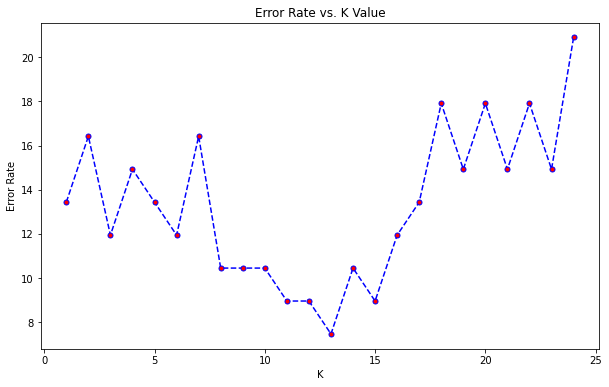

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),vita_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

[90.9090909090909, 90.9090909090909, 90.9090909090909, 88.63636363636364, 90.9090909090909, 90.9090909090909, 90.9090909090909, 88.63636363636364, 88.63636363636364, 88.63636363636364, 88.63636363636364, 88.63636363636364, 90.9090909090909, 88.63636363636364, 88.63636363636364, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636, 86.36363636363636]


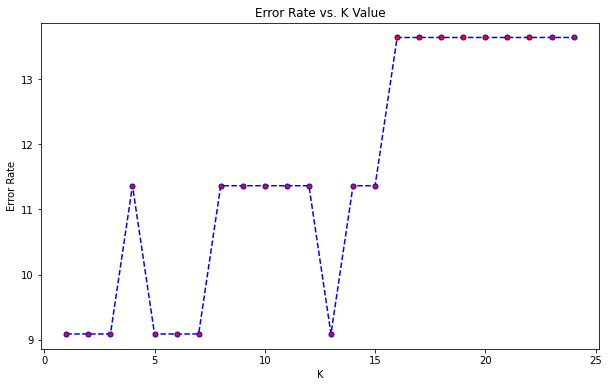

In [41]:
print(bacterial_rate_predictions)

plt.figure(figsize=(10,6))
plt.plot(range(1,25),bact_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [42]:
best_k_vita = np.where(vitamin_a_predictions == np.amax(vitamin_a_predictions))
best_k_vita = best_k_vita[0][-1] + 1
best_k_vita

13

In [43]:
best_bact_rate = np.where(bacterial_rate_predictions == np.amax(bacterial_rate_predictions))
best_bact_rate = best_bact_rate[0][-1] + 1
best_bact_rate

13

In [44]:
knn_bacterial_rate = KNeighborsClassifier(n_neighbors=best_bact_rate).fit(X_train_bact_rate, y_train_bact_rate)
knn_vitamin_a = KNeighborsClassifier(n_neighbors=best_k_vita).fit(X_train, y_train)

In [45]:
bacterial_accuracies['knn'] = knn_bacterial_rate.score(X_test_bact_rate, y_test_bact_rate)*100
vitamin_accuracies['knn'] = knn_vitamin_a.score(X_test, y_test)*100

### Classifier 3: Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

vita_gnb = GaussianNB().fit(X_train, y_train)

bact_rate_gnb = GaussianNB().fit(X_train_bact_rate, y_train_bact_rate)

bacterial_accuracies['gnb'] = bact_rate_gnb.score(X_test_bact_rate, y_test_bact_rate)*100
vitamin_accuracies['gnb'] = vita_gnb.score(X_test, y_test)*100

### Classifier 4: Support vector machines

In [47]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

vitamin_accuracies['svc'] = svc.score(X_test, y_test)*100

bact_rate_svc = SVC()
bact_rate_svc.fit(X_train_bact_rate, y_train_bact_rate)

bacterial_accuracies['svc'] = bact_rate_svc.score(X_test_bact_rate, y_test_bact_rate)*100

### Classifier 5: Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)

rfc.score(X_test, y_test)*100
vitamin_accuracies['rfc'] = rfc.score(X_test, y_test)*100

In [49]:
rfc = RandomForestClassifier().fit(X_train_bact_rate, y_train_bact_rate)

bacterial_accuracies['rfc'] = rfc.score(X_test_bact_rate, y_test_bact_rate)*100

### Classifier 5: Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
gbc_accuracies = []
for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=4, max_depth=5, random_state=0).fit(X_train, y_train)
    gbc_accuracies.append(gbc.score(X_test, y_test)*100)

best_lr_vita = np.where(gbc_accuracies == np.amax(gbc_accuracies))
best_lr_vita = lr_list[best_lr_vita[0][-1]]
best_lr_vita

gbc_vita = GradientBoostingClassifier(n_estimators=20, learning_rate=best_lr_vita, max_features=4, max_depth=5, random_state=0).fit(X_train, y_train)
vitamin_accuracies['gradient_boosting'] = gbc_vita.score(X_test, y_test)*100

In [51]:
gbc_accuracies = []
for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=4, max_depth=5, random_state=0).fit(X_train_bact_rate, y_train_bact_rate)
    gbc_accuracies.append(gbc.score(X_test_bact_rate, y_test_bact_rate)*100)
    

best_lr_bact = np.where(gbc_accuracies == np.amax(gbc_accuracies))
best_lr_bact = lr_list[best_lr_bact[0][-1]]
print(best_lr_bact)

gbc_vita = GradientBoostingClassifier(n_estimators=20, learning_rate=best_lr_bact, max_features=4, max_depth=5, random_state=0).fit(X_train_bact_rate, y_train_bact_rate)
bacterial_accuracies['gradient_boosting'] = gbc_vita.score(X_test_bact_rate, y_test_bact_rate)*100

1


### Classifier 6: Stochastic Gradient Descent

In [52]:
from sklearn.linear_model import SGDClassifier

sdg = SGDClassifier().fit(X_train, y_train)

vitamin_accuracies['s_gradient_descent'] = sdg.score(X_test, y_test)*100

In [53]:
sdg_bact_rate = SGDClassifier().fit(X_train_bact_rate, y_train_bact_rate)

bacterial_accuracies['s_gradient_descent'] = sdg_bact_rate.score(X_test_bact_rate, y_test_bact_rate)*100

### Classifier 7: Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
vitamin_accuracies['logistic_regression'] = clf.score(X_test, y_test)*100

In [55]:
clf_y_bact_rate = LogisticRegression(random_state=0).fit(X_train_bact_rate, y_train_bact_rate)
bacterial_accuracies['logistic_regression'] = clf_y_bact_rate.score(X_test_bact_rate, y_test_bact_rate)*100

### Comparing Classifiers

In [56]:
print(bacterial_accuracies)
print()
print(vitamin_accuracies)

{'dtree': 79.54545454545455, 'knn': 90.9090909090909, 'gnb': 79.54545454545455, 'svc': 88.63636363636364, 'rfc': 88.63636363636364, 'gradient_boosting': 90.9090909090909, 's_gradient_descent': 86.36363636363636, 'logistic_regression': 88.63636363636364}

{'dtree': 81.81818181818183, 'knn': 92.53731343283582, 'gnb': 74.6268656716418, 'svc': 89.55223880597015, 'rfc': 82.08955223880598, 'gradient_boosting': 83.5820895522388, 's_gradient_descent': 76.11940298507463, 'logistic_regression': 86.56716417910447}


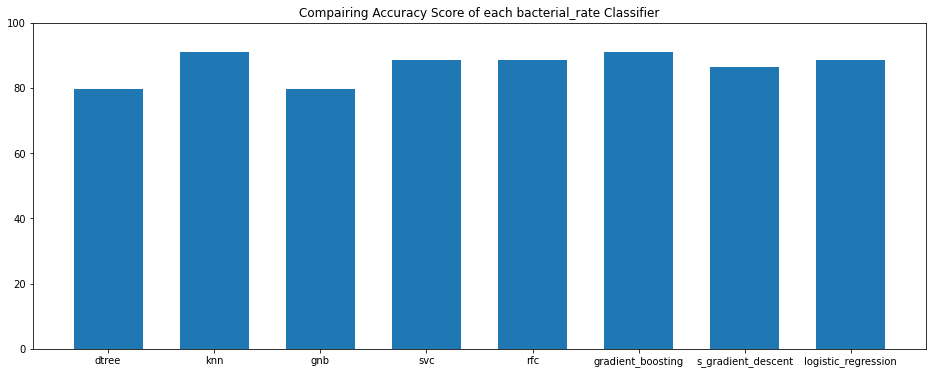

In [57]:
plt.figure(figsize=(16, 6))
plt.bar(list(bacterial_accuracies.keys()), bacterial_accuracies.values(), 0.65, align='center')
plt.ylim(0, 100)
plt.title("Compairing Accuracy Score of each bacterial_rate Classifier")
plt.show()

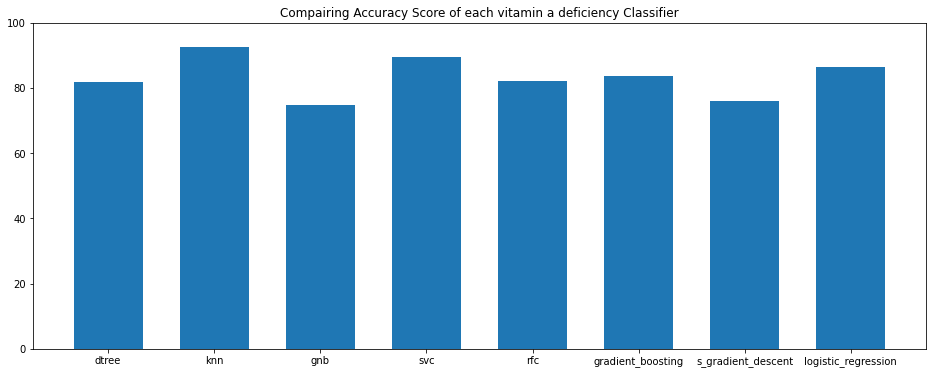

In [58]:
plt.figure(figsize=(16, 6))
plt.bar(list(vitamin_accuracies.keys()), vitamin_accuracies.values(), 0.65, align='center')
plt.ylim(0, 100)
plt.title("Compairing Accuracy Score of each vitamin a deficiency Classifier")
plt.show()

In [59]:
import pickle
bacterial_rate = 'bacterial_rate_model.save'
vitamin_a = 'vitamin_a_model.save'
bacterial_dict = 'bacterial_dict.save'
vitamin_dict = 'vitamin_dict.save'
pickle.dump(knn_bacterial_rate, open(bacterial_rate, 'wb'))
pickle.dump(knn_vitamin_a, open(vitamin_a, 'wb'))
pickle.dump(bacterial_accuracies, open(bacterial_dict, 'wb'))
pickle.dump(vitamin_accuracies, open(vitamin_dict, 'wb'))
pickle.dump(attribute_list, open('attribute_list.save', 'wb'))